### Take data from multiple sources and preprocess it

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Load Data

In [ ]:
df1 = pd.read_csv('Water_Consumption_Data_June_2025.csv')
df2 = pd.read_csv('Water_Consumption_Data_May_2025.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ward number             202 non-null    int64  
 1   Ward Name               202 non-null    object 
 2   Number of Connectionss  202 non-null    int64  
 3   Consumption in ML       202 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ward number             202 non-null    int64  
 1   Ward Name               202 non-null    object 
 2   Number of Connectionss  202 non-null    int64  
 3   Consumption in ML       202 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


In [6]:
# Combine the dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df.head()

,Ward number,Ward Name,Number of Connectionss,Consumption in ML
0,1,Kempegowda Ward,4218,112.883906
1,2,Chowdeshwari Ward,460,9.808984
2,3,Attur,6109,170.257709
3,4,Yelahanka Satellite town,7741,405.676363
4,5,Jakkur,3752,108.076916


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ward number             404 non-null    int64  
 1   Ward Name               404 non-null    object 
 2   Number of Connectionss  404 non-null    int64  
 3   Consumption in ML       404 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.8+ KB


In [8]:
combined_df.describe()

,Ward number,Number of Connectionss,Consumption in ML
count,404.000000,404.000000,404.000000
mean,99.722772,5109.339109,152.404402
std,57.473458,2515.536309,88.721068
min,1.000000,1.000000,-0.000002
25%,50.000000,3459.000000,94.007312
50%,99.500000,4567.500000,130.092223
75%,150.000000,5969.000000,184.077380
max,198.000000,16297.000000,572.166949


### Data preprocessing

Data Cleaning

In [9]:
# Data Cleaning - these are the columns: Ward number ,Ward Name,Number of Connectionss,Consumption in ML

# Remove duplicates
combined_df.drop_duplicates(inplace=False)

# Fill missing values
combined_df.fillna(method='ffill', inplace=False)

# Convert data types if necessary
combined_df['Consumption in ML'] = combined_df['Consumption in ML'].astype(float)

# Outlier detection and removal
q1 = combined_df['Consumption in ML'].quantile(0.25)
q3 = combined_df['Consumption in ML'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
combined_df = combined_df[(combined_df['Consumption in ML'] >= lower_bound) & (combined_df['Consumption in ML'] <= upper_bound)]

combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 403
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ward number             377 non-null    int64  
 1   Ward Name               377 non-null    object 
 2   Number of Connectionss  377 non-null    int64  
 3   Consumption in ML       377 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 14.7+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_24060\1126056242.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=False)


In [10]:
combined_df.describe()

,Ward number,Number of Connectionss,Consumption in ML
count,377.000000,377.000000,377.000000
mean,98.705570,4832.342175,135.924829
std,56.860933,2141.326465,63.747841
min,1.000000,1.000000,-0.000002
25%,49.000000,3410.000000,91.500888
50%,99.000000,4479.000000,123.475721
75%,147.000000,5781.000000,168.984706
max,198.000000,14453.000000,317.500943


Data Transformation

In [11]:
# Min-Max Scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(combined_df[['Consumption in ML']])
scaled_df = pd.DataFrame(scaled_values, columns=['Scaled Consumption in ML'])
combined_df['Scaled Consumption in ML'] = scaled_df['Scaled Consumption in ML']
combined_df.head()

,Ward number,Ward Name,Number of Connectionss,Consumption in ML,Scaled Consumption in ML
0,1,Kempegowda Ward,4218,112.883906,0.355539
1,2,Chowdeshwari Ward,460,9.808984,0.030894
2,3,Attur,6109,170.257709,0.536243
4,5,Jakkur,3752,108.076916,0.168286
5,6,Thanisandra,3568,53.430968,0.945489


In [14]:
# Save combined and cleaned data
combined_df.to_csv('Combined_Water_Consumption_Data.csv', index=False)

# Load the cleaned data
cleaned_df = pd.read_csv('Combined_Water_Consumption_Data.csv')

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ward number               377 non-null    int64  
 1   Ward Name                 377 non-null    object 
 2   Number of Connectionss    377 non-null    int64  
 3   Consumption in ML         377 non-null    float64
 4   Scaled Consumption in ML  354 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.9+ KB


In [15]:
cleaned_df.describe()

,Ward number,Number of Connectionss,Consumption in ML,Scaled Consumption in ML
count,377.000000,377.000000,377.000000,354.000000
mean,98.705570,4832.342175,135.924829,0.423766
std,56.860933,2141.326465,63.747841,0.200250
min,1.000000,1.000000,-0.000002,0.000000
25%,49.000000,3410.000000,91.500888,0.286564
50%,99.000000,4479.000000,123.475721,0.381681
75%,147.000000,5781.000000,168.984706,0.526794
max,198.000000,14453.000000,317.500943,1.000000


In [16]:
cleaned_df

,Ward number,Ward Name,Number of Connectionss,Consumption in ML,Scaled Consumption in ML
0,1,Kempegowda Ward,4218,112.883906,0.355539
1,2,Chowdeshwari Ward,460,9.808984,0.030894
2,3,Attur,6109,170.257709,0.536243
3,5,Jakkur,3752,108.076916,0.168286
4,6,Thanisandra,3568,53.430968,0.945489
...,...,...,...,...,...
372,194,Gottigere,3616,97.966944,NaN
373,195,Konanakunte,9973,295.339582,NaN
374,196,Anjanapura,7529,277.485835,NaN
375,197,Vasanthapura,4341,151.926934,NaN


Correlation matrix 

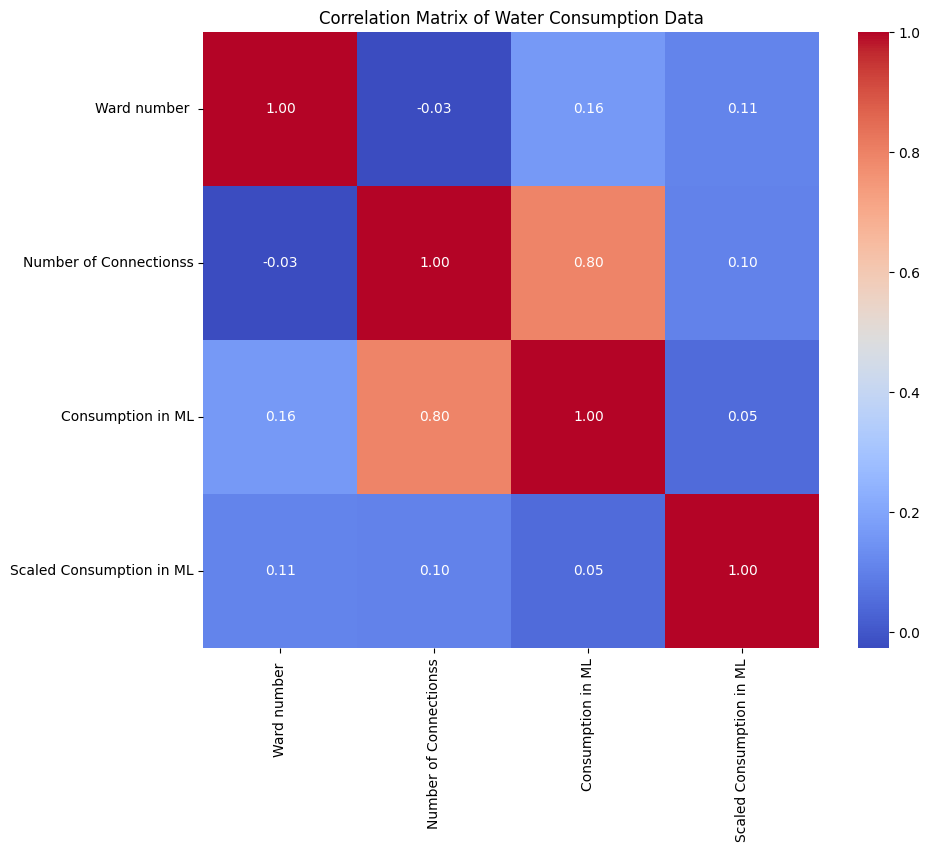

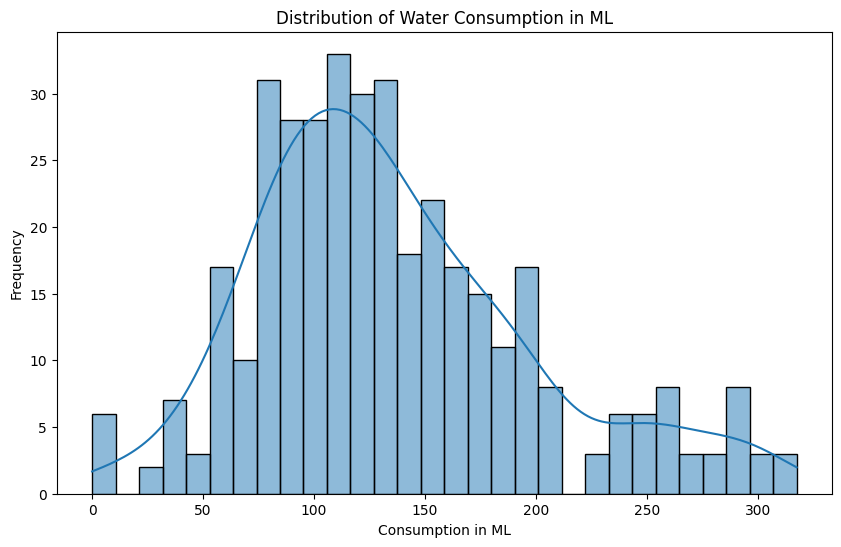

In [13]:
# Correlation matrix of numerical features
correlation_matrix = combined_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Water Consumption Data')
plt.show()
# Visualizing the distribution of water consumption
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Consumption in ML'], bins=30, kde=True)
plt.title('Distribution of Water Consumption in ML')
plt.xlabel('Consumption in ML')
plt.ylabel('Frequency')
plt.show()